# 2025 Championship Analysis

In this notebook I will take a look at the 2025 WDC championship mainly.

The idea is: McLaren easily won WCC but lost (or almost lost) the WDC. I'm starting the work on this before the championship actually finished.

In [1]:
import pandas as pd
import utils as fxns
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import os


Bad key xtick.pad in file b:\projetos\f1_analytics\notebooks\dark_theme.mplstyle, line 47 ('xtick.pad: 8            # Adiciona espaço entre o eixo X e os labels')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.10.5/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution


In [2]:
# Caminho absoluto da raiz do projeto
project_root = Path.cwd().parent  # se o notebook está em /notebooks
print("Diretório atual:", Path.cwd())
os.chdir(project_root)

from src.modules.db_reader import DbReader
f1_db = DbReader()

Diretório atual: b:\projetos\f1_analytics\notebooks


In [3]:
# Drivers Standings

df_wdc = f1_db.run_query_file('data/db_queries/drivers_standings.sql')
df_wdc = df_wdc[df_wdc['year']==2025]

In [4]:
df_wdc

,round_id,year,race_name,driver_id,driver_ref,driver_number,driver_code,driver_forename,driver_surname,driver_full_name,points,position,wins
0,1143.0,2025,Singapore Grand Prix,857,piastri,81.0,PIA,Oscar,Piastri,Oscar Piastri,336.0,1.0,7
1,1143.0,2025,Singapore Grand Prix,845,norris,4.0,NOR,Lando,Norris,Lando Norris,314.0,2.0,5
2,1143.0,2025,Singapore Grand Prix,831,max_verstappen,33.0,VER,Max,Verstappen,Max Verstappen,273.0,3.0,4
3,1143.0,2025,Singapore Grand Prix,847,russell,63.0,RUS,George,Russell,George Russell,237.0,4.0,2
4,1143.0,2025,Singapore Grand Prix,843,leclerc,16.0,LEC,Charles,Leclerc,Charles Leclerc,173.0,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,1126.0,2025,Australian Grand Prix,795,hamilton,44.0,HAM,Lewis,Hamilton,Lewis Hamilton,1.0,10.0,0
368,1126.0,2025,Australian Grand Prix,841,gasly,10.0,GAS,Pierre,Gasly,Pierre Gasly,0.0,11.0,0
369,1126.0,2025,Australian Grand Prix,851,tsunoda,22.0,TSU,Yuki,Tsunoda,Yuki Tsunoda,0.0,12.0,0
370,1126.0,2025,Australian Grand Prix,838,ocon,31.0,OCO,Esteban,Ocon,Esteban Ocon,0.0,13.0,0


In [5]:
df_wcc = f1_db.run_query_file('data/db_queries/constructors_standings.sql')
df_wcc = df_wcc[df_wcc['year']==2025]

In [6]:
df_wcc

,round_id,year,race_name,team_id,constructor_name,constructor_nationality,points,position,wins
0,1143.0,2025,Singapore Grand Prix,117,McLaren,British,650.0,1.0,12
1,1143.0,2025,Singapore Grand Prix,48,Mercedes,German,325.0,2.0,2
2,1143.0,2025,Singapore Grand Prix,6,Ferrari,Italian,298.0,3.0,0
3,1143.0,2025,Singapore Grand Prix,191,Red Bull,Austrian,290.0,4.0,4
4,1143.0,2025,Singapore Grand Prix,141,Williams,British,102.0,5.0,0
...,...,...,...,...,...,...,...,...,...
175,1126.0,2025,Australian Grand Prix,182,Sauber,Swiss,6.0,6.0,0
176,1126.0,2025,Australian Grand Prix,6,Ferrari,Italian,5.0,7.0,0
177,1126.0,2025,Australian Grand Prix,210,Alpine F1 Team,French,0.0,8.0,0
178,1126.0,2025,Australian Grand Prix,211,RB F1 Team,Italian,0.0,9.0,0


## Championship Evolution: 

McLaren easily won the WCC. Let's take a look:

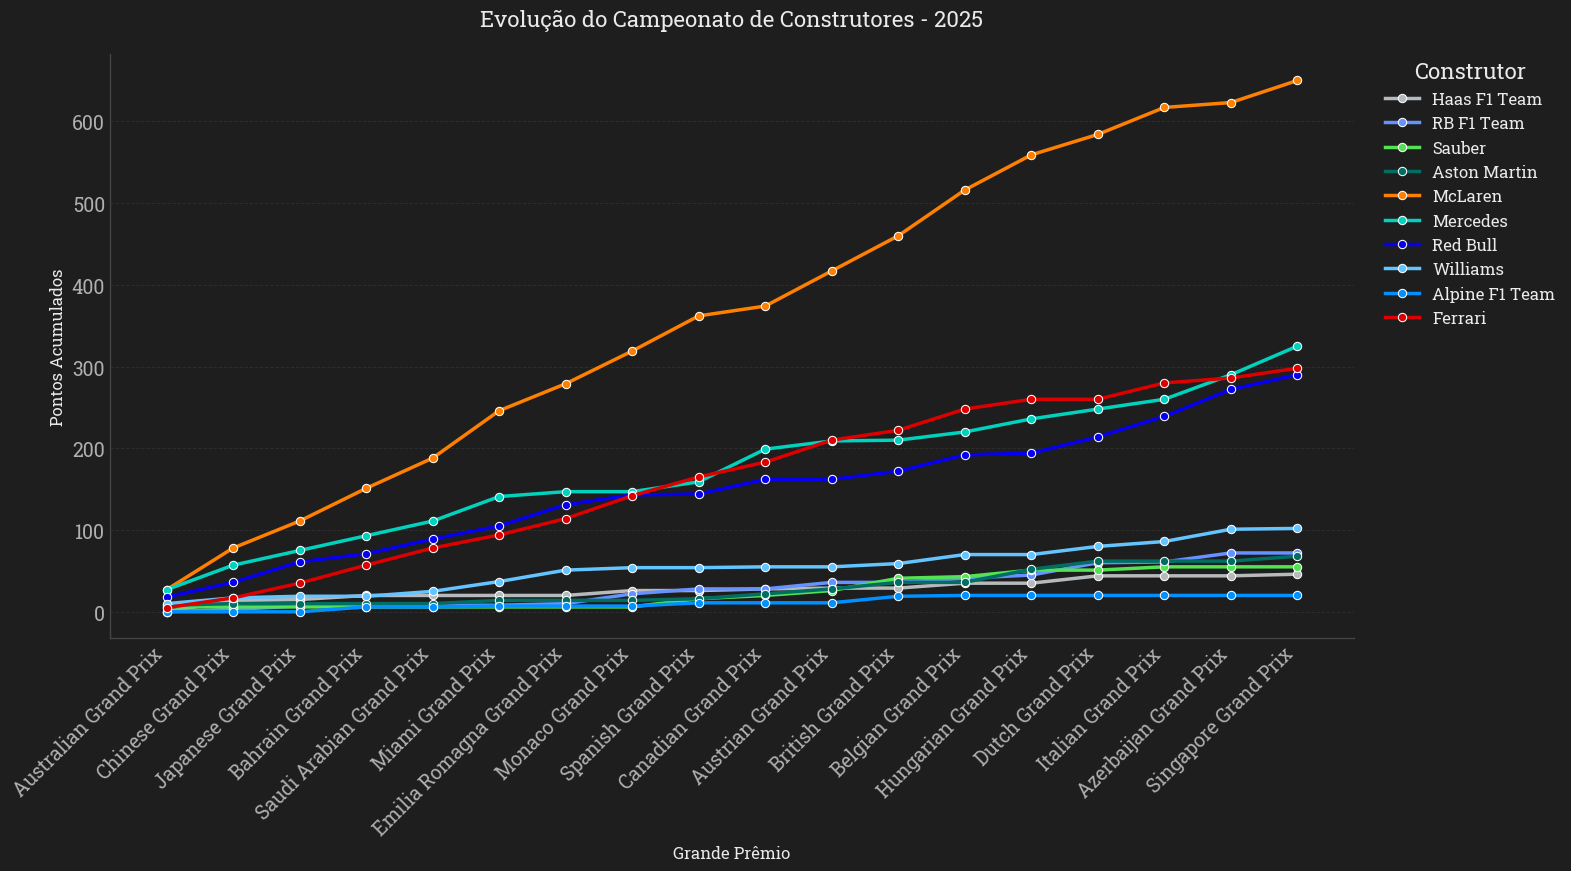

In [7]:
fxns.plotar_evolucao_construtores(df_campeonato=df_wcc)